# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
matrix, vector = main.spare_matrix_Abt(50, 12)

In [3]:
# 1. Solve
def solve(m, v):
    matrix_sq, vector_sq = main.square_from_rectan(m, v)
    res = np.linalg.solve(matrix_sq, vector_sq)
    return res


x1 = solve(matrix, vector)
residuum_x1 = main.residual_norm(matrix, x1, vector)

saved_timing1 = %timeit -r 10 -n 100 -o solve(matrix, vector)
saved_mem1 = %memit -o  solve(matrix, vector)
print('Norma residuum:', residuum_x1)

The slowest run took 5.33 times longer than the fastest. This could mean that an intermediate result is being cached.
30.6 µs ± 17.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 121.72 MiB, increment: 0.16 MiB
Norma residuum: 5.166128572698256e-08


In [4]:
# 2. Lstsq
def lstsq(m, v):
    res = np.linalg.lstsq(m, v, rcond=-1)[0]
    return res


x2 = lstsq(matrix, vector)
residuum_x2 = main.residual_norm(matrix, x2, vector)

saved_timing2 = %timeit -r 10 -n 100 -o lstsq(matrix, vector)
saved_mem2 = %memit -o lstsq(matrix, vector)
print('Norma residuum:', residuum_x2)

24.2 µs ± 11.2 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 121.78 MiB, increment: 0.00 MiB
Norma residuum: 7.999154875681779e-09


In [5]:
# 3. QR
def qr(m, v):
    q, r = np.linalg.qr(m)
    res = sp.linalg.solve_triangular(r, q.T @ v)
    return res


x3 = qr(matrix, vector)
residuum_x3 = main.residual_norm(matrix, x3, vector)

saved_timing3 = %timeit -r 10 -n 100 -o qr(matrix, vector)
saved_mem3 = %memit -o qr(matrix, vector)
print('Norma residuum:', residuum_x3)

19.4 µs ± 3.03 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 121.88 MiB, increment: 0.00 MiB
Norma residuum: 7.999155282750941e-09


In [6]:
# 4. SVD
def svd(m, v):
    U, S, V = np.linalg.svd(m, full_matrices=False)
    S = np.diag(S)
    res = V.T @ np.linalg.solve(S, U.T @ v)
    return res


x4 = svd(matrix, vector)
residuum_x4 = main.residual_norm(matrix, x4, vector)

saved_timing4 = %timeit -r 10 -n 100 -o svd(matrix, vector)
saved_mem4 = %memit -o svd(matrix, vector)
print('Norma residuum:', residuum_x4)

The slowest run took 15.02 times longer than the fastest. This could mean that an intermediate result is being cached.
128 µs ± 117 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 122.05 MiB, increment: 0.00 MiB
Norma residuum: 7.999154914720337e-09


***Wnioski***
Po wykonaniu testów czasowych można wywnioskować, że najszybszym sposobem na obliczenie wyników rozwiązania równania, jest przekształcenie macierzy prostokątnej na kwadratową, ale metoda ta generuje największe błedy, co można wywnioskować z nawiększej normy residuum. Wszystkie inne metody generują rozwiązania podobnej jakości, ale w zależności od wybranej metody czasy ich wykonania różnią się w mniejszym lub większym stopniu.

***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


Współczynniki wyliczone za pomocą macierzy rzadkiej: a = [23.08251017], b = [1.20918071]
Współczynniki wyliczone za pomocą funkcji polyval: a = 23.08251016850696, b = 1.2091807088901798


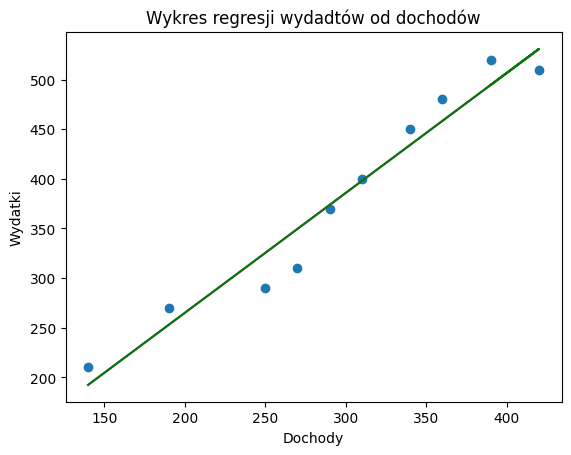

In [7]:
d = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
w = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

a = np.polyfit(d, w, 1)

d = d.reshape(10, 1)
w = w.reshape(10, 1)
one = np.ones((10, 1))

d_m = np.concatenate((one, d), axis=1)
Q, R = np.linalg.qr(d_m)
z = sp.linalg.solve_triangular(R, Q.T @ w)

y_a = z[0] + z[1] * d
y_b = a[0] * d + a[1]

fig1, ax = plt.subplots()
ax.scatter(d, w)
ax.plot(d, y_a, 'm')
ax.plot(d, y_b, 'g')
ax.set_title('Wykres regresji wydadtów od dochodów')
ax.set(xlabel='Dochody', ylabel='Wydatki')

print(f'Współczynniki wyliczone za pomocą macierzy rzadkiej: a = {z[0]}, b = {z[1]}')
print(f'Współczynniki wyliczone za pomocą funkcji polyval: a = {a[1]}, b = {a[0]}')

***Wnioski***
W zadaniu 2 została wyliczona linia regresji za pomocą macierzy rzadkiej. Jej współczynniki można porównać z wynikami uzyskanymi za pomocą funkcji polyfit. Wyniki te są bardzo bliskie sobie, więc można wywnioskować że wyliczona linia regresji nie jest obarczona dużym błędem obliczeniowym.

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [8]:
x1 = np.random.normal(0, 1, size=(100, 1))
x2 = np.random.normal(0, 1, size=(100, 1))
e = np.random.normal(0, 1, size=(100, 1))

y = 2 + x1 - 0.5 * x2 + e

one_m = np.ones([100, 1])

x3 = np.concatenate([one_m, x1], axis=1)
x4 = np.concatenate([one_m, x2], axis=1)
x5 = np.concatenate([one_m, x1, x2], axis=1)
x6 = np.concatenate([one_m, x2, x2], axis=1)

In [9]:
pred1 = [min(x1), max(x1)]
pred2 = [min(x2), max(x2)]

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

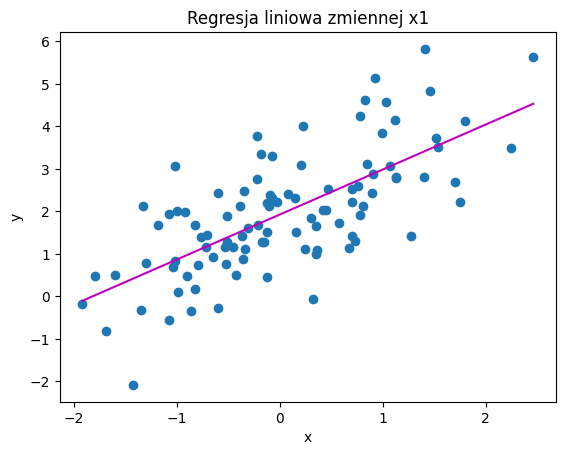

In [10]:
# y~a+x1
Q, R = np.linalg.qr(x3)
b = sp.linalg.solve_triangular(R, Q.T @ y)
y_1 = b[0] + b[1] * pred1

fig2, ax = plt.subplots()
ax.scatter(x1, y)
ax.plot(pred1, y_1, 'm')
ax.set_title('Regresja liniowa zmiennej x1')
ax.set(xlabel='x', ylabel='y')

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

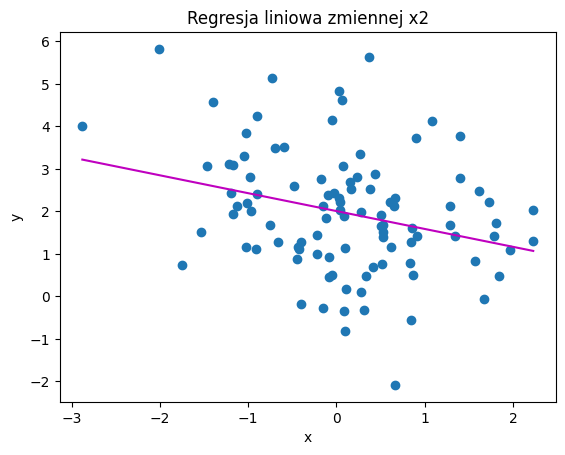

In [11]:
# y~a+x2
Q, R = np.linalg.qr(x4)
b = sp.linalg.solve_triangular(R, Q.T @ y)
y_2 = b[0] + b[1] * pred2

fig3, ax = plt.subplots()
ax.scatter(x2, y)
ax.plot(pred2, y_2, 'm')
ax.set_title('Regresja liniowa zmiennej x2')
ax.set(xlabel='x', ylabel='y')

[Text(0.5, 0, 'x1'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'y')]

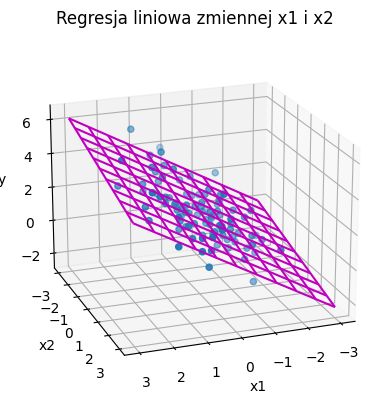

In [12]:
# y~a+x1+x2
Q, R = np.linalg.qr(x5)
b = sp.linalg.solve_triangular(R, Q.T @ y)
X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))

y_3 = b[0] + b[1] * X + b[2] * Y

fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, y_3, color='m', rstride=100, cstride=100)
ax.scatter(x1, x2, y)
ax.view_init(20, 70)
ax.set_title('Regresja liniowa zmiennej x1 i x2')
ax.set(xlabel='x1', ylabel='x2', zlabel='y')

[Text(0.5, 0, 'x2'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'y')]

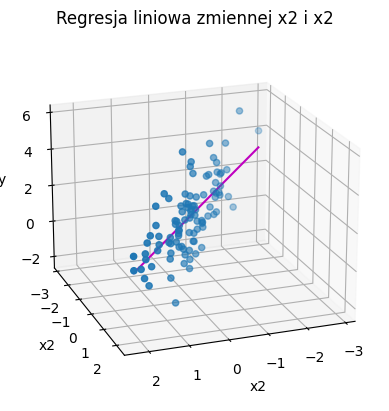

In [13]:
# y~a+x2+x2
Q, R = np.linalg.qr(x6)
b = sp.linalg.solve_triangular(R, Q.T @ y)
X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
pred = np.array([pred2[0][0], pred2[1][0]])
y_4 = b[0] + b[1] * pred + b[2] * pred

fig5 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x2, x2, y)
ax.plot(xs=pred, ys=pred, zs=y_4, color='m')
ax.view_init(20, 70)
ax.set_title('Regresja liniowa zmiennej x2 i x2')
ax.set(xlabel='x2', ylabel='x2', zlabel='y')

***Wnioski***
W zadaniu 3 wyliczyliśmy linię regresji na podstawie macierzy rzadkiej. Pierwszy raz spotkałem się z takim sposobem jej wyliczania. Nie umiem niestety ocenić na ile dokładne są te obliczenia, więc trudno jest mi przeanalizować otrzymane wyniki.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)